# Capital Asset Pricing Model

## Preparing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Rendibilitats R en % diari"

In [6]:
data = pd.read_csv('resources/CAPM_data.csv').set_index('Date')
data = data[::-1]
returns = data.pct_change()*100
returns = returns.dropna()
returns = returns[::-1]
returns.head()

,IBEX,ABE,BBVA,ELE,ENG,GRF,IDX,SAN,TEF
Date,,,,,,,,,
20/01/11,0.812697,1.305842,1.270208,2.848576,0.515464,-0.089366,-1.037415,0.691244,0.614182
19/01/11,-0.053095,-0.614754,0.231481,0.050000,0.648508,1.634877,0.068074,-0.686499,-0.111545
18/01/11,2.939936,2.881237,5.365854,1.781170,1.581028,0.181984,1.801802,4.047619,2.107062
17/01/11,-0.916838,-0.905292,-1.560624,0.976362,0.796813,0.548948,-0.994854,-2.552204,-0.397050
14/01/11,0.219000,2.939068,0.847458,-2.700000,-1.375246,1.016636,-1.270110,-0.231481,-0.339175


In [4]:
r = 0.3
R = np.full(9, r)

## Sharpe-Lietner

In [139]:
cov = returns.cov().to_numpy()
var = returns.var().to_numpy()
ibex_cov = cov[0, :]
betas = ibex_cov / var[0]
print(f"Betas: {betas}")

Betas: [1.         0.61918003 1.57893169 0.57632766 0.59817411 0.62616924
 0.4999283  1.52967256 0.749981  ]


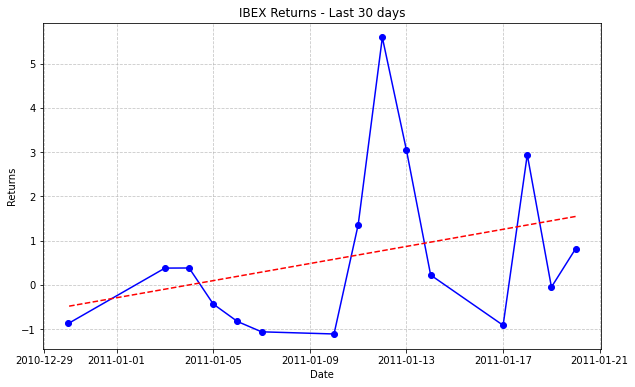

In [162]:
plt.figure(figsize=(10, 6))

data_series = returns['IBEX'].iloc[:15]

data_series.index = pd.to_datetime(data_series.index, format='%d/%m/%y')
X = (data_series.index - data_series.index[0]).days.values
y = data_series.values

# Fitting a linear regression line
coefficients = np.polyfit(X, y, deg=1)
linear_regression_line = np.polyval(coefficients, X)

# Plotting the first 30 data points of the 'IBEX' column
plt.plot(data_series, marker='o', linestyle='-', color='b', label='IBEX')

plt.plot(data_series.index.to_numpy(), linear_regression_line, linestyle='--', color='r', label='Linear Regression')

plt.grid(True, linestyle='--', alpha=0.7)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('IBEX Returns - Last 30 days')
plt.show()

In [163]:
ibex_predicted_value = linear_regression_line[0] + coefficients[0]
print(ibex_predicted_value)
z = R + (ibex_predicted_value-r)*betas
print(f"Expected returns: {z}")

1.640152024710941
Expected returns: [1.64015202 1.12979537 2.4160085  1.07236668 1.10164425 1.13916197
 0.96997993 2.34999379 1.30508856]


grafic pag 103?

# BLACK
NOMÉS PELS TÍTOLS: Inversa de la matriu de covariàncies"

In [142]:
icov = np.linalg.inv(cov[1:, 1:])
mu = returns.mean().to_numpy()

In [143]:
v1 = icov.sum(axis=1)
vm = np.matmul(icov, mu[1:])
wg = v1/v1.sum()
wd = vm/vm.sum()
wg

array([ 0.24443715, -0.29945145,  0.23187014,  0.16698058,  0.07079039,
        0.15758974, -0.0897543 ,  0.51753775])

In [144]:
betag = np.matmul(np.transpose(wg), betas[1:])
betag

0.2860129723135349

In [145]:
ibex_returns = returns.iloc[:, 0].to_numpy()
mat_returns = returns.iloc[:, 1:].to_numpy()
zg = np.matmul(mat_returns, wg)
zg

array([ 0.77141087,  0.03064443,  0.79849065,  0.51114958, -0.67399117,
        0.08888365,  0.73805198,  0.58394375,  1.01239106,  0.25216892,
        0.14371461, -0.10243375,  0.16858905, -1.15883114, -1.08316868,
        0.5385722 , -0.0543034 , -1.42917598, -0.33666783,  1.3320304 ,
        0.84930082,  0.14290392,  0.30490966,  0.60058861, -0.99465395,
        0.88105151,  1.10249988,  0.14221237, -0.00373053,  0.65132068,
        0.08407611,  0.03262847,  1.22771158,  0.53784306,  0.93703136,
       -0.87442696, -1.45010431,  0.23324231, -1.64258061, -0.22502989,
       -0.69742983, -1.40093841,  0.00343675,  1.37426763,  0.01806214,
       -0.84704553,  0.94734091, -0.53118114, -2.00161494, -0.30805033,
        0.42197919, -1.83757723, -1.38671552,  0.79082751, -0.19932745,
        0.17679909,  0.83724384, -0.28819107,  1.60609504,  0.25122315,
        0.04692849,  0.59782466,  0.74697677,  0.95744513, -0.49781119,
       -0.75086289, -0.13874456, -0.2005602 ,  1.46204367,  1.69

In [146]:
x = -betag/(1-betag)
x

-0.40058567063928857

In [147]:
wibex = np.matmul(np.transpose(betas[1:]), icov)
wibex

array([ 0.03731969,  0.02915937, -0.0040437 ,  0.03053334, -0.00037578,
        0.00673482,  0.13941327,  0.14530185])

In [148]:
zz = zg + x*(ibex_returns - zg)
zz

array([ 0.75487205,  0.0641894 , -0.0593415 ,  1.08318113, -1.0317105 ,
       -1.09187204, -1.20551128,  0.2744396 ,  1.863812  ,  0.77949674,
        0.53387157,  0.03124277,  0.0844065 , -1.77369228, -1.16606403,
        0.36631329, -0.2030609 , -1.24873769, -0.28527483,  1.85116648,
        0.35448682, -0.18851176,  0.9531657 ,  0.72770821, -0.85998621,
        0.99532161,  1.30898565,  0.43862626, -0.61312962,  0.17118349,
        0.13624191,  0.55015432,  1.3831769 , -0.5458548 , -0.55542195,
       -0.97271269, -1.17596357,  0.99709221, -2.24187531, -0.59638858,
        0.23539979, -0.86351617,  0.19655933,  1.32057356, -0.42954694,
       -0.32812884,  0.73668357, -1.19141489, -2.4743561 ,  0.24511021,
        0.05330796, -1.9792719 , -1.1092221 ,  0.89484215,  0.45623274,
       -0.19918406,  1.78939604, -0.65490147,  1.95926365,  0.66514818,
        0.21881391,  1.04494131,  0.8029519 ,  1.48656274, -0.76620062,
       -1.17618589, -0.39977257, -0.34538201,  2.01026795,  1.35

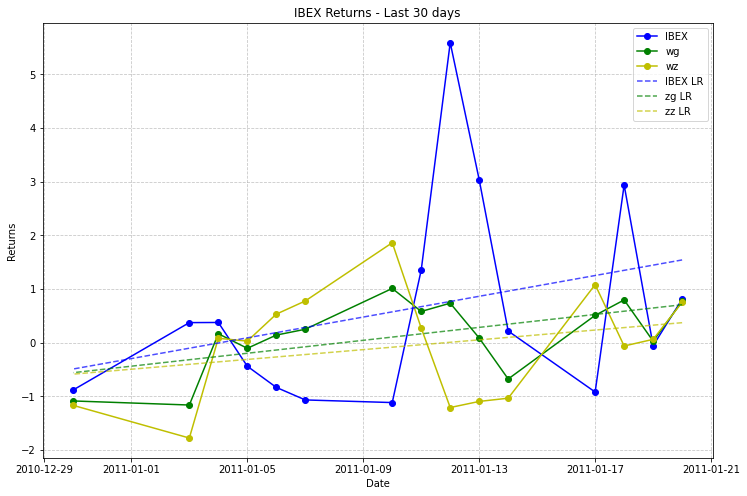

Predicted Values: 
      IBEX: 1.6402
      zg: 0.7691
      zz: 0.4201


In [170]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

ibex_series = returns['IBEX'].iloc[:15]

ibex_series.index = pd.to_datetime(ibex_series.index, format='%d/%m/%y')
X = (ibex_series.index - ibex_series.index[0]).days.values

# Plotting the first 30 data points of the 'IBEX' column
plt.plot(ibex_series, marker='o', linestyle='-', color='b', label='IBEX')

plt.plot(ibex_series.index.to_numpy(), zg[:15], marker='o', linestyle='-', color='g', label='wg')

plt.plot(ibex_series.index.to_numpy(), zz[:15], marker='o', linestyle='-', color='y', label='wz')

#linear regressions
y = ibex_series.values
coefficients = np.polyfit(X, y, deg=1)
linear_regression_line = np.polyval(coefficients, X)
ibex_predicted_value = linear_regression_line[0] + coefficients[0]
plt.plot(ibex_series.index.to_numpy(), linear_regression_line, linestyle='--', color='b', label='IBEX LR', alpha=0.7)

y = zg[:15]
coefficients = np.polyfit(X, y, deg=1)
linear_regression_line = np.polyval(coefficients, X)
zg_predicted_value = linear_regression_line[0] + coefficients[0]
plt.plot(ibex_series.index.to_numpy(), linear_regression_line, linestyle='--', color='g', label='zg LR', alpha=0.7)

y = zz[:15]
coefficients = np.polyfit(X, y, deg=1)
linear_regression_line = np.polyval(coefficients, X)
zz_predicted_value = linear_regression_line[0] + coefficients[0]
plt.plot(ibex_series.index.to_numpy(), linear_regression_line, linestyle='--', color='y', label='zz LR', alpha=0.7)


plt.grid(True, linestyle='--', alpha=0.7)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('IBEX Returns - Last 30 days')
plt.legend()
plt.show()

print(f'''Predicted Values: 
      IBEX: {round(ibex_predicted_value, 4)}
      zg: {round(zg_predicted_value, 4)}
      zz: {round(zz_predicted_value, 4)}''')

0 correlation

In [181]:
np.corrcoef(zz, ibex_returns)

array([[ 1.00000000e+00, -2.04105092e-16],
       [-2.04105092e-16,  1.00000000e+00]])

In [182]:
z = zz_predicted_value + (ibex_predicted_value-zz_predicted_value)*betas
z

array([1.64015202, 1.17554411, 2.34646018, 1.12326336, 1.14991647,
       1.18407108, 1.03005463, 2.28636306, 1.33512389])